In [2]:
##Building Linear Regressor 
##Loading data and label into variables
##Separating training dataset and testing dataset (80%/20%)
##Checking test dataset output

In [3]:
##Linear regressor help to identify relation between output and input
##Regression is the process of estimationf the relationship between input data
##and continious valued output data, uses linear combination of input variables
##The goal is to estimate underlyiing function that governs the mapping from input to 
##the output or extract the linear model that relates the input variables to the output
##Aims to minimize the sum of squares of differences between the actual output and
## it predicted output using a linear function - ORDINARY LEAST SQUARES

In [4]:
##Linear model tries to approximate figure the input data points using a straight line 


In [5]:
import sys
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb
from pylab import rcParams
from matplotlib import pyplot
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
from collections import Counter

In [6]:
%matplotlib inline
rcParams['figure.figsize']= 15, 8
sb.set_style('whitegrid')

In [7]:
dataset = pd.read_csv('Original_sales_history.csv', index_col=0)

In [8]:
dataset.shape

(52815, 1)

In [9]:
dataset.describe

<bound method NDFrame.describe of                          transaction_total
transaction_created_utc                   
2019-03-05 21:52:26                   9.67
2019-03-05 21:51:03                   8.69
2019-03-05 21:44:14                   8.82
2019-03-05 21:49:40                  13.06
2019-03-05 21:51:38                   7.23
2019-03-05 21:54:51                  47.49
2019-03-05 21:44:57                   3.68
2019-03-05 21:53:52                  47.37
2019-03-05 21:48:14                  15.86
2019-03-05 21:45:46                  12.44
2019-03-05 21:47:15                   9.64
2019-03-05 22:03:44                   7.97
2019-03-05 22:00:06                  21.21
2019-03-05 21:56:32                  11.62
2019-03-05 21:57:24                  10.70
2019-03-05 22:01:04                   4.41
2019-03-05 22:00:44                  45.45
2019-03-05 21:58:42                  17.11
2019-03-05 22:02:36                   3.61
2019-03-05 22:08:53                  21.19
2019-03-05 22:15:30 

In [10]:
dataset.shape

(52815, 1)

In [11]:
print(dataset.head(20))

                         transaction_total
transaction_created_utc                   
2019-03-05 21:52:26                   9.67
2019-03-05 21:51:03                   8.69
2019-03-05 21:44:14                   8.82
2019-03-05 21:49:40                  13.06
2019-03-05 21:51:38                   7.23
2019-03-05 21:54:51                  47.49
2019-03-05 21:44:57                   3.68
2019-03-05 21:53:52                  47.37
2019-03-05 21:48:14                  15.86
2019-03-05 21:45:46                  12.44
2019-03-05 21:47:15                   9.64
2019-03-05 22:03:44                   7.97
2019-03-05 22:00:06                  21.21
2019-03-05 21:56:32                  11.62
2019-03-05 21:57:24                  10.70
2019-03-05 22:01:04                   4.41
2019-03-05 22:00:44                  45.45
2019-03-05 21:58:42                  17.11
2019-03-05 22:02:36                   3.61
2019-03-05 22:08:53                  21.19


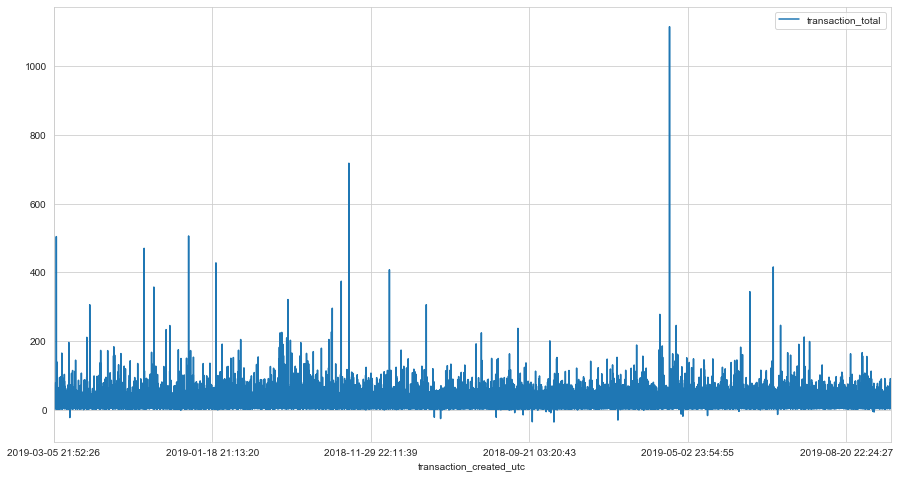

In [12]:
dataset.plot()

In [13]:
pyplot.show()

In [14]:
#split the dataset into the training and validation datasets

In [15]:
series = pd.read_csv('Original_sales_history.csv', index_col=0)
num_validation=int(0.2*len(series))
split_point = len(series) - num_validation
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('train.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 42252, Validation 10563


In [16]:
# create a differenced series
# make the data stationary

In [17]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [18]:
## We can invert this operation by adding the value of the observation one year ago. We will need to do this to any forecasts made
## by a model trained on the seasonally adjusted data.

In [19]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [20]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [21]:
## ARIMA diff

In [22]:
# load dataset
series = read_csv('train.csv', header=None, index_col=0)


In [23]:
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)



In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

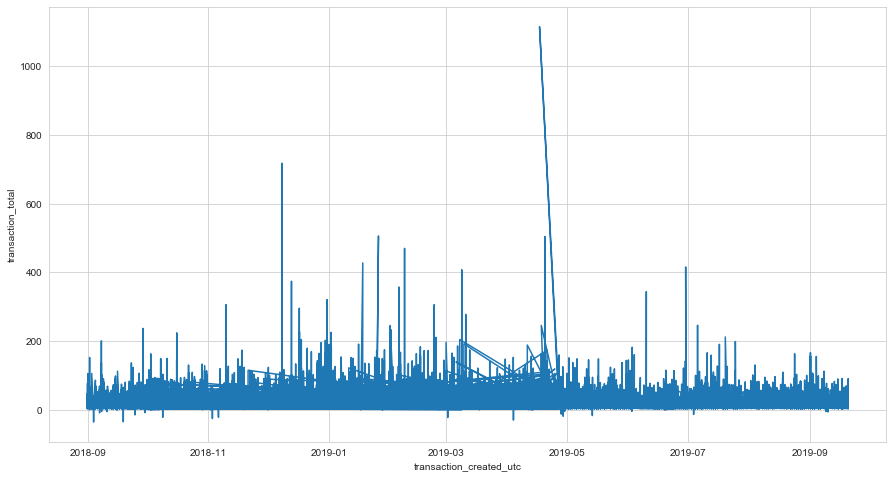

In [25]:
df = pd.read_csv('Original_sales_history.csv', parse_dates = ['transaction_created_utc'], index_col = ['transaction_created_utc'])
df.head()
plt.xlabel('transaction_created_utc')
plt.ylabel('transaction_total')
plt.plot(df)

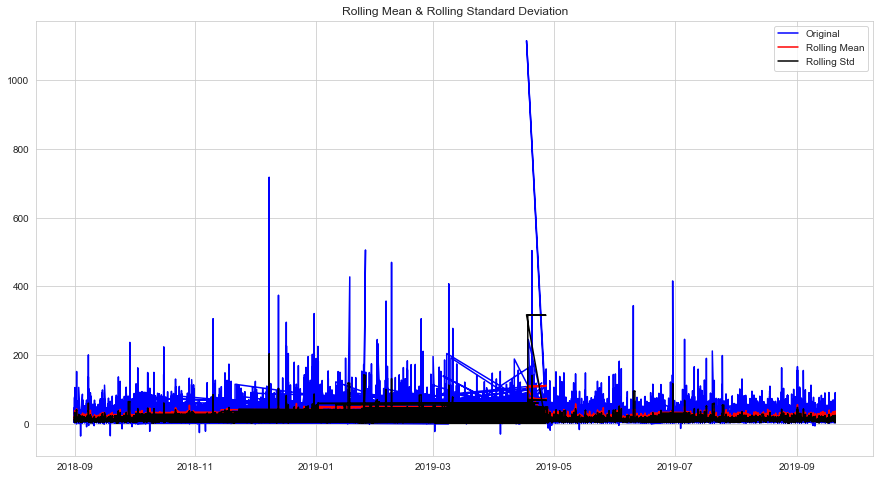

In [26]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [27]:
result = adfuller(df['transaction_total'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -30.577230220251494
p-value: 0.0
Critical Values:
	1%: -3.43047390333584
	5%: -2.8615947627933718
	10%: -2.5667991484126738
